# <font color=red> Compte rendu TP2 :Segmentation</font>
# Réalisé par:Sakly Amal(3DNIG1)


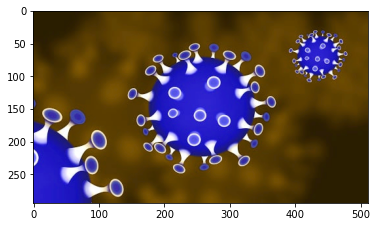

In [5]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('covid.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('covid3.jpg', quant)
plt.imshow(image)

cv2.imread('covid.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

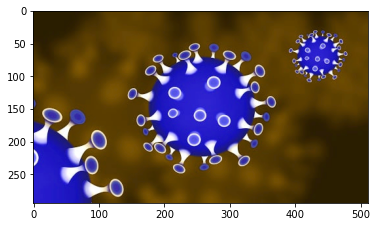

In [6]:
plt.imshow(image)

In [7]:
!pip install opencv-python

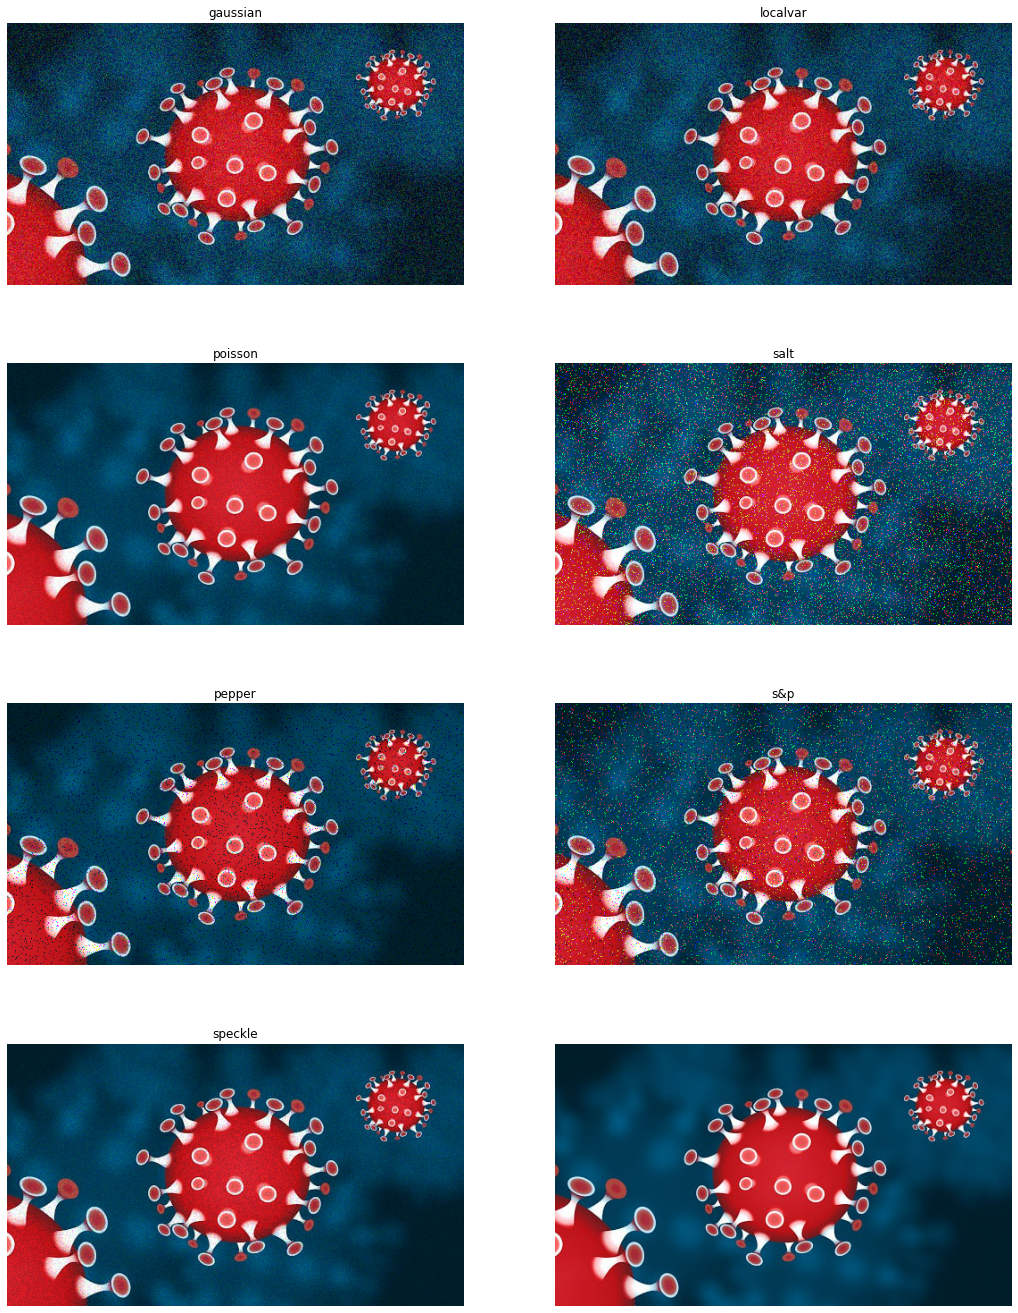

In [8]:
import skimage.io
import matplotlib.pyplot as plt
img_path="covid.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        
       
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


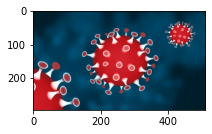

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('covid.jpg')
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb


plt.subplot(212),plt.imshow(rgb_dst)
plt.show()

In [10]:
pip install watermark


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [13]:
%load_ext watermark
%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega_datasets,watermark
print("")
%watermark -u -n -t -z

CPython 3.8.3
IPython 7.16.1

wget 3.2
pandas 1.0.5
numpy 1.18.5
geopy 2.0.0
altair 4.1.0
vega_datasets 0.8.0
watermark 2.0.2

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit

last updated: Fri Nov 06 2020 21:23:46 Paris, Madrid


In [14]:
pip install vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install altair 

Note: you may need to restart the kernel to use updated packages.


In [16]:
%load_ext watermark
%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega_datasets,watermark
print("")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.8.3
IPython 7.16.1

wget 3.2
pandas 1.0.5
numpy 1.18.5
geopy 2.0.0
altair 4.1.0
vega_datasets 0.8.0
watermark 2.0.2

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit

last updated: Fri Nov 06 2020 21:23:51 Paris, Madrid


In [17]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="covid.jpg"
img = skimage.io.imread(img_path)/255.0

 

def plotnoise(mode):
    img_path="covid.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt"]);

 
plt.show()


<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt'), value=…

In [18]:
def segm(k):
    image = cv2.imread('covid.jpg')
    (h1, w1) = image.shape[:2]

 

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

 

    image = image.reshape((image.shape[0] * image.shape[1], 3))

 


    clt = KMeans(n_clusters = k)

 

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

 

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

 

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

 

    plt.figure(figsize=(10,11))
    cv2.imwrite('covid3.jpg', quant)
    return plt.imshow(image)
plt.show()
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(segm,k=widgets.IntSlider(min=2, max=4, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=4, min=2), Output()), _dom_classes=('widget-inte…